<a href="https://colab.research.google.com/github/spotlight9k/algorithms-complexity/blob/main/R_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all we have to install package of "**ISLR**" to have an access to the necessary dataset. 

For plotting a scatter plot with marginals we use "**psych**" package.

And "**corrplot**" package for correlation analysis and vizualization.


 



In [100]:
install.packages("ISLR", quiet=TRUE)
install.packages("psych", quiet=TRUE)
install.packages("corrplot", quiet=TRUE)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




Now we add some global options for aestetics.

In [2]:
options(width=140)

font_size_title = 1.5
font_size_labels = 1.5
font_size_axis = 1.5

Than, upload the dataset itself, using package which we have installed earlier. 

I have chosen the "***Carseats***" dataset and save it to the global variable **df**.

After this, we want to see how much rows and columns are in our dataset and finally look at first 10 rows. 

In [3]:
library(ISLR)

data(package="ISLR")
df <- Carseats

print(ncol(df))
print(nrow(df))

head(df, 10)

[1] 11
[1] 400


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
9,6.54,132,110,0,108,124,Medium,76,10,No,No


On the next step we show all column names from our dataset. 

In [17]:
colnames(df)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population"  "Price"       "ShelveLoc"   "Age"         "Education"  
[10] "Urban"       "US"

Now, let's figure out the factor levels and their length of columns **"*Advertising*"**, "***Age***" and "***Education***". I chose these columns since the fact that columns "***Urban***", "***US***" and "***ShelveLoc***" explicitly defined by values (e.g. "***Yes***"/"***No***" or "***Bad***"/"***Medium***"/"***Good***").
 
While the columns which linked with money and population (e.g. "***Sales***", "***Price***" or "***Population***") have unlike values located in a huge range, hence we will see a huge number of factor levels, which would not give us any useful information that we could use in the future analysis.



In [15]:
factor(df[['Advertising']])

length(factor(df[['Advertising']]))

nlevels(factor(df[['Advertising']]))

[1] 11 16 10 4  3  13 0  15 0  0  9  4  2  11 11 5  0  13 0  16 2  12 6  0  16 0  11 0  0  15 0  16 12 13 0  11 0  5  0  0  0  0  0  11 6 
 [46] 0  14 0  0  0  18 0  3  13 13 5  0  0  15 4  19 0  0  10 12 0  0  14 20 0  15 16 0  10 5  23 10 12 1  0  16 0  4  7  0  0  9  7  7  3 
 [91] 0  11 0  0  5  10 10 5  24 3  11 0  0  0  0  8  0  0  2  0  7  12 5  11 9  0  0  0  2  8  11 10 5  0  0  0  2  3  3  7  13 3  9  2  0 
[136] 14 0  0  12 10 10 0  0  7  0  11 0  9  0  13 8  17 0  7  10 0  0  8  1  0  0  5  0  0  0  7  17 0  0  15 12 12 13 5  0  0  9  0  14 3 
[181] 15 0  4  6  7  11 0  0  0  18 13 13 0  7  18 4  6  0  5  5  0  0  4  0  0  1  0  0  0  11 2  14 19 5  3  15 0  0  12 19 15 0  6  9  0 
[226] 0  0  10 13 0  0  0  10 18 11 8  16 8  0  0  0  0  0  13 0  0  20 0  0  0  10 5  0  5  23 8  0  14 0  10 8  4  15 6  5  10 12 7  0  0 
[271] 0  0  0  8  2  11 14 12 2  13 10 7  0  0  11 11 11 4  0  25 14 0  16 0  3  14 13 13 0  17 1  0  13 16 12 26 1  0  19 13 29 12 5  3  10
[316] 8  5  0  10 19 12 5  10 18 4  11 0  17 1  9  0  15 20 7  9  15 6  0  0  4  0  0  13 10 0  0  0  0  20 18 17 16 14 12 1  0  0  3  10 11
[361] 7  10 0  1  16 0  11 0  10 22 22 0  0  0  7  4  19 0  3  0  10 21 19 0  15 13 0  14 11 8  9  0  13 10 19 17 3  12 7  0 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 29

[1] 400

[1] 28

In [16]:
factor(df[['Age']])

length(factor(df[['Age']]))

nlevels(factor(df[['Age']]))

[1] 42 65 59 55 38 78 71 67 76 76 26 50 62 53 52 76 63 52 46 69 35 62 42 79 42 54 50 64 55 58 30 44 64 50 42 44 60 54 65 38 73 58 50 59 69
 [46] 44 48 55 69 32 80 75 39 61 76 61 50 75 74 80 29 26 77 61 32 55 56 47 60 65 74 58 25 31 64 36 64 67 65 41 68 70 28 56 43 49 64 54 62 45
 [91] 64 80 29 55 55 59 73 33 36 56 76 34 65 78 51 61 70 60 65 60 43 43 62 33 65 42 80 41 62 64 63 28 75 29 63 43 59 51 55 40 51 77 72 62 76
[136] 36 31 80 44 30 45 28 77 28 34 47 39 41 72 56 57 75 45 25 50 65 51 48 39 30 29 67 51 39 27 27 55 60 45 73 71 75 35 66 79 25 47 27 25 77
[181] 66 68 25 80 60 64 46 62 76 26 37 74 56 61 45 66 72 76 69 64 62 54 46 25 37 28 77 61 33 76 47 32 45 33 73 71 34 70 25 58 30 80 35 62 48
[226] 36 56 57 26 27 38 27 61 29 56 50 69 48 73 62 26 38 52 57 26 57 78 34 61 65 72 62 32 57 37 80 73 80 72 74 36 54 48 25 31 39 73 51 39 46
[271] 26 62 38 58 34 53 73 36 40 64 51 45 61 80 79 39 67 44 76 43 41 39 76 59 60 79 63 75 63 54 45 57 74 43 29 33 48 61 52 68 53 51 38 66 71
[316] 29 35 80 41 57 44 34 60 34 53 47 53 80 55 45 32 32 61 41 42 72 28 80 45 44 43 72 71 26 70 79 33 27 49 49 63 62 61 35 42 42 72 34 69 66
[361] 52 56 79 25 30 57 53 52 74 36 42 54 65 78 47 73 44 41 79 54 68 77 66 63 28 62 39 73 79 35 67 56 34 30 33 33 55 40 50 49
56 Levels: 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 ... 80

[1] 400

[1] 56

In [14]:
factor(df[['Education']])

length(factor(df[['Education']]))

nlevels(factor(df[['Education']]))

[1] 17 10 12 14 13 16 15 10 10 17 10 13 18 18 18 18 13 10 17 12 18 18 13 10 12 11 11 17 11 17 12 18 10 16 17 17 18 10 15 10 17 16 18 13 13
 [46] 12 15 16 18 17 16 16 18 17 17 18 17 11 16 13 13 13 17 13 16 13 18 16 13 12 12 17 15 11 13 16 15 18 12 13 11 13 17 11 18 13 15 16 10 16
 [91] 11 15 12 17 11 13 16 16 16 16 12 18 16 17 12 11 18 12 16 17 14 14 12 12 13 13 10 12 11 12 13 10 10 15 14 15 16 14 13 10 12 16 10 12 16
[136] 18 18 11 10 13 18 15 15 17 11 17 14 16 14 11 10 17 13 17 16 16 16 13 10 18 12 12 13 17 13 15 11 13 10 18 10 15 16 18 15 12 11 17 14 18
[181] 13 11 13 18 11 10 17 17 15 15 13 14 14 10 11 11 16 16 10 14 12 18 10 14 14 12 17 10 12 11 14 15 11 10 18 11 17 14 14 17 10 11 13 14 13
[226] 14 14 16 11 18 14 11 15 14 16 17 10 10 13 16 18 12 14 10 18 10 18 16 11 11 14 13 16 12 17 15 10 13 14 11 10 15 18 17 15 17 17 12 11 17
[271] 10 16 12 12 11 11 15 16 15 18 10 16 11 16 17 10 18 17 15 17 11 17 15 10 11 10 18 10 15 17 11 16 14 11 10 13 12 12 10 18 12 14 10 13 14
[316] 14 10 15 14 11 18 15 15 12 13 11 17 16 11 12 14 10 12 10 13 15 18 15 11 15 16 10 10 14 13 12 13 14 11 14 17 16 17 12 18 11 12 15 11 14
[361] 15 15 12 12 14 17 12 17 14 14 12 16 11 17 12 11 11 12 12 15 17 13 14 10 12 17 16 14 16 12 12 16 13 17 16 14 11 18 12 16
Levels: 10 11 12 13 14 15 16 17 18

[1] 400

[1] 9

According to this information we can say that the data in these columns is complete, which means that for each row(from 0 to 400) we have a specific value. 

What is more, the number of levels is not that huge:
* 28 for "***Advertising***"
* 56 for "***Age***"
* 9 for "***Education***"

The next step is a **summary** analysis of the dataset, which we use to get table with required statistics. 

In [18]:
print(summary(df))

     Sales          CompPrice       Income        Advertising       Population        Price        ShelveLoc        Age       
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000   Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000   1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000   Median :272.0   Median :117.0   Medium:219   Median :54.50  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635   Mean   :264.8   Mean   :115.8                Mean   :53.32  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000   3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000   Max.   :509.0   Max.   :191.0                Max.   :80.00  
   Education    Urban       US     
 Min.   :10.0   No :118   No :142  
 1st Qu.:12.0   Yes:282   Yes:258  
 Me

From the statistics above we can see that almost columns distributed with some small skews to the right or to the left, however, there are some non-trivial stats. 

For instance, lets analyse "***Price***" and "***Advertising***".

* **Price**  

     The **median** and **mean** are relatively close to each other(117.0 and 115.8), however, since the fact that **median** > **mean** we will see a small left skew. 
     
     The main reason for this is the fact that the **min** is 91.8 units away from **mean**, while the **max** is only 75.2 units away. So this outlier of 24.0(**min**) can provide the shift to the left.
     
     
* **Advertising**  

     Here we can see a strong right skew since the fact that the  **median** < **mean** and the Q1 cotains only zeroes. 

     Moreover, the distance between **min** and **mean** is 6.635, while the **max** is 22.37 units away from **mean**. 

     In my opinion, the outlier from the left(29.0) and outlier of zeroes in the first quartile is the reason for such strong shift. 
    



In both cases our regression line can be affected by these outliers, and probably we will have to make some changes to provide precise regression.

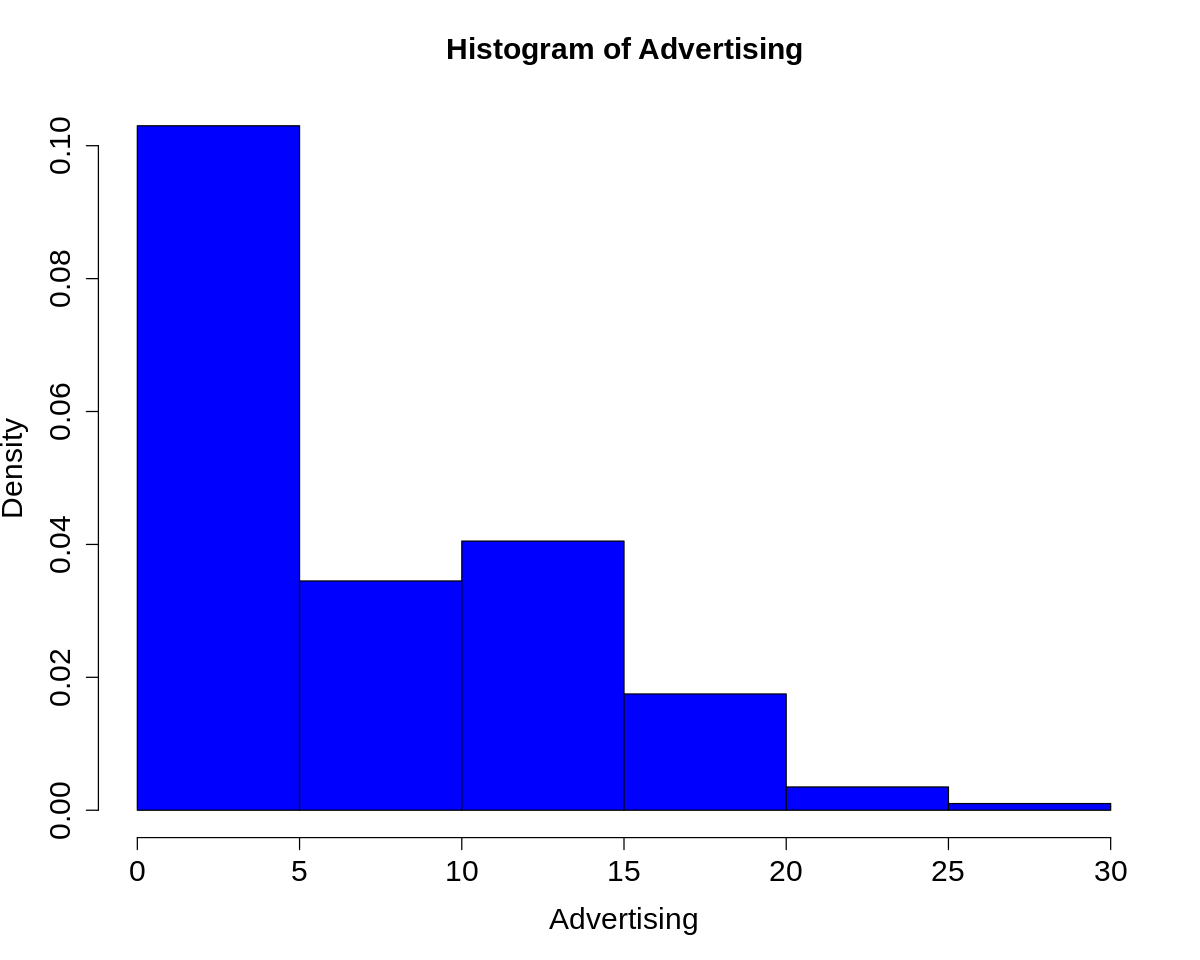

In [80]:
options(repr.plot.width=10, repr.plot.height=8)

hist(df$Advertising, xlab='Advertising',  ylab="Density", main="Histogram of Advertising", col="blue", prob=TRUE, 
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)

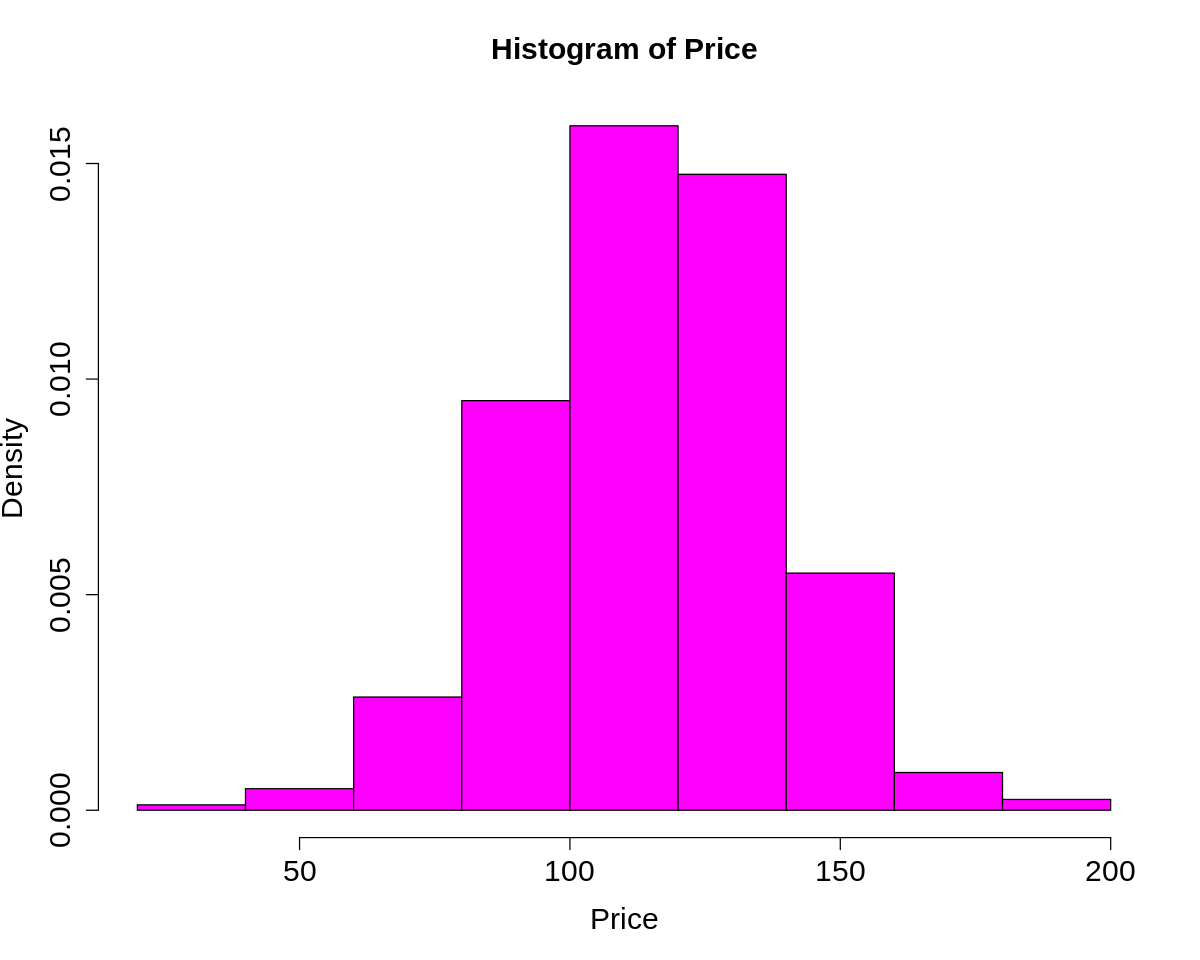

In [79]:
options(repr.plot.width=10, repr.plot.height=8)

hist(df$Price, xlab='Price',  ylab="Density", main="Histogram of Price", prob=TRUE, col="magenta",
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)

Two histograms above show the skews of "***Advertising***" and "***Price***" columns.

As it can be seeing, the "***Advertising***" histohram has a right shift, while the "***Price***" histogram has a left shift.

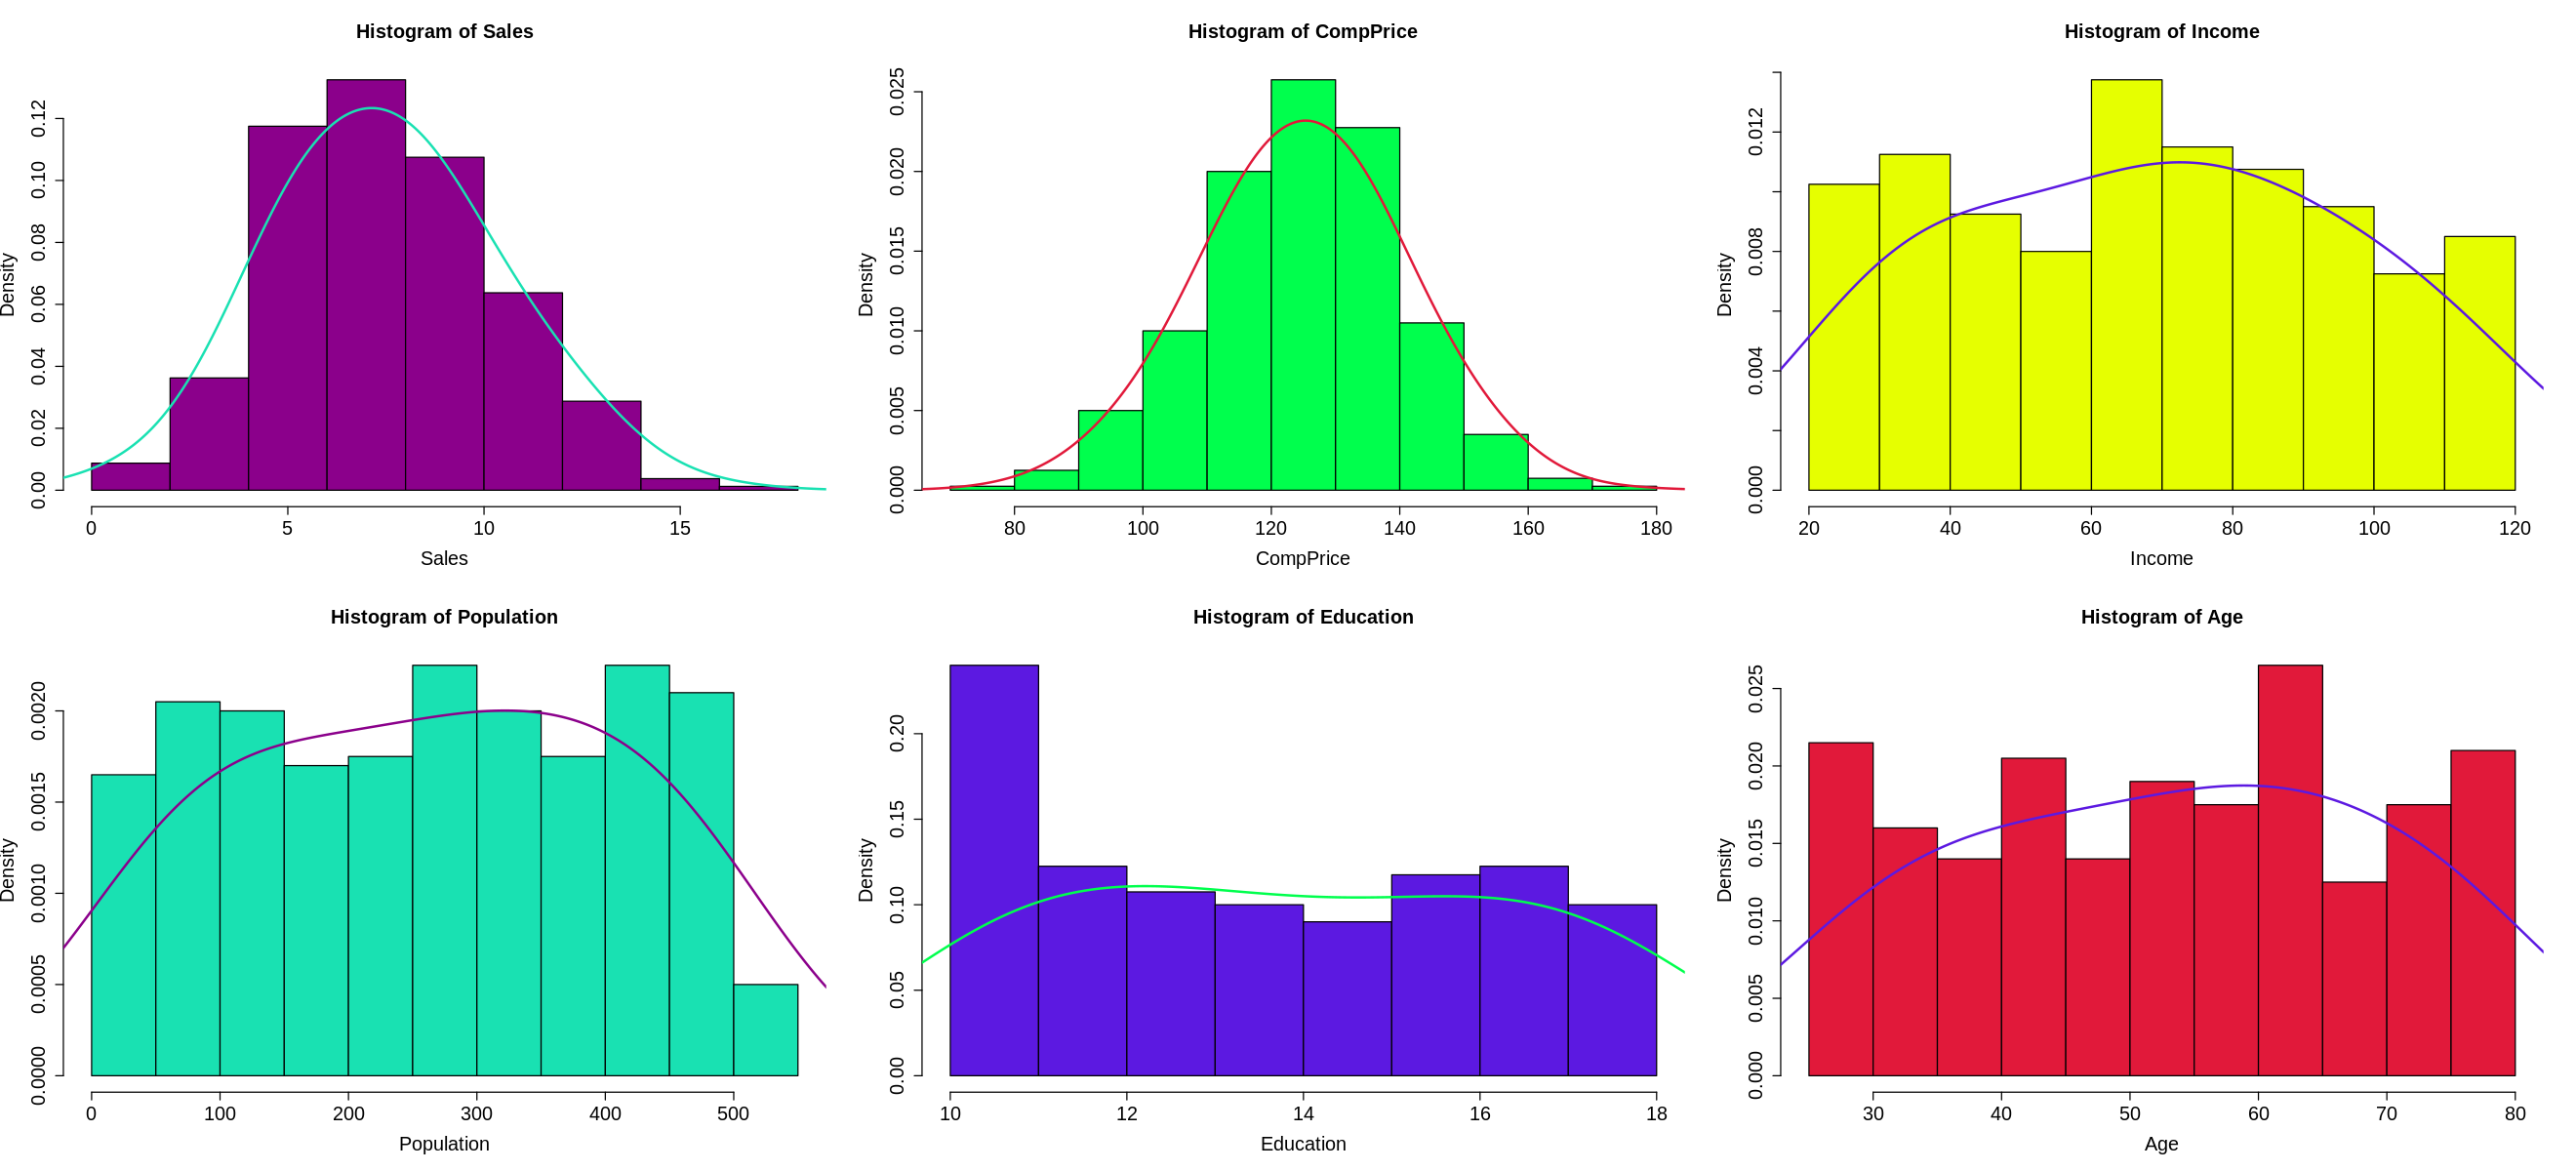

In [59]:
par(mfrow = c(2, 3))

options(repr.plot.width=22, repr.plot.height=10)

hist(df$Sales, xlab='Sales',  ylab="Density", main="Histogram of Sales", prob=TRUE, col="darkmagenta",
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)
lines(density(df$Sales, adjust=2), col="#19E1B2", lwd=2)

hist(df$CompPrice, xlab='CompPrice',  ylab="Density", main="Histogram of CompPrice", prob=TRUE, col="#00FF4D",
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)
lines(density(df$CompPrice, adjust=2), col="#E1193A", lwd=2)

hist(df$Income, xlab='Income',  ylab="Density", main="Histogram of Income", prob=TRUE, col="#E6FF00",
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)
lines(density(df$Income, adjust=2), col="#5C19E1", lwd=2)
     
hist(df$Population, xlab='Population',  ylab="Density", main="Histogram of Population", prob=TRUE, col="#19E1B2",
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)
lines(density(df$Population, adjust=2), col="darkmagenta", lwd=2)

hist(df$Education, xlab='Education',  ylab="Density", main="Histogram of Education", prob=TRUE, col="#5C19E1",
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)
lines(density(df$Education, adjust=2), col="#00FF4D", lwd=2)

hist(df$Age, xlab='Age',  ylab="Density", main="Histogram of Age", prob=TRUE, col="#E1193A",
     cex.lab=font_size_labels, cex.axis=font_size_axis, cex.main=font_size_title)
lines(density(df$Age, adjust=2), col="#5C19E1", lwd=2)

On the histograms above the distribution of each columns can be seen. 

The next step is the correlation. 

Firstly, I rid of columns with non-numeric values. 

Than, I create a corrplot whic shows the correlation of each column with others. 

So, according to this data, we can see that the correlation is quite weak, however, there are some noticable pairs. 

For instance, such pairs as: ***Population - Advertising***, ***Sales - Advertising*** and ***Price - CompPrice*** show strong correlation.

Alsom a strong negative correlation is noticeable in pair ***Price - Sales***.


In [70]:
df$US<- NULL
df$US <- NULL
df$ShelveLoc <- NULL
df$Urban <- NULL
cor_df <- df
cor_df <- cor(cor_df)
print(cor_df)

                  Sales   CompPrice       Income  Advertising   Population       Price          Age    Education
Sales        1.00000000  0.06407873  0.151950979  0.269506781  0.050470984 -0.44495073 -0.231815440 -0.051955242
CompPrice    0.06407873  1.00000000 -0.080653423 -0.024198788 -0.094706516  0.58484777 -0.100238817  0.025197050
Income       0.15195098 -0.08065342  1.000000000  0.058994706 -0.007876994 -0.05669820 -0.004670094 -0.056855422
Advertising  0.26950678 -0.02419879  0.058994706  1.000000000  0.265652145  0.04453687 -0.004557497 -0.033594307
Population   0.05047098 -0.09470652 -0.007876994  0.265652145  1.000000000 -0.01214362 -0.042663355 -0.106378231
Price       -0.44495073  0.58484777 -0.056698202  0.044536874 -0.012143620  1.00000000 -0.102176839  0.011746599
Age         -0.23181544 -0.10023882 -0.004670094 -0.004557497 -0.042663355 -0.10217684  1.000000000  0.006488032
Education   -0.05195524  0.02519705 -0.056855422 -0.033594307 -0.106378231  0.01174660  0.006488

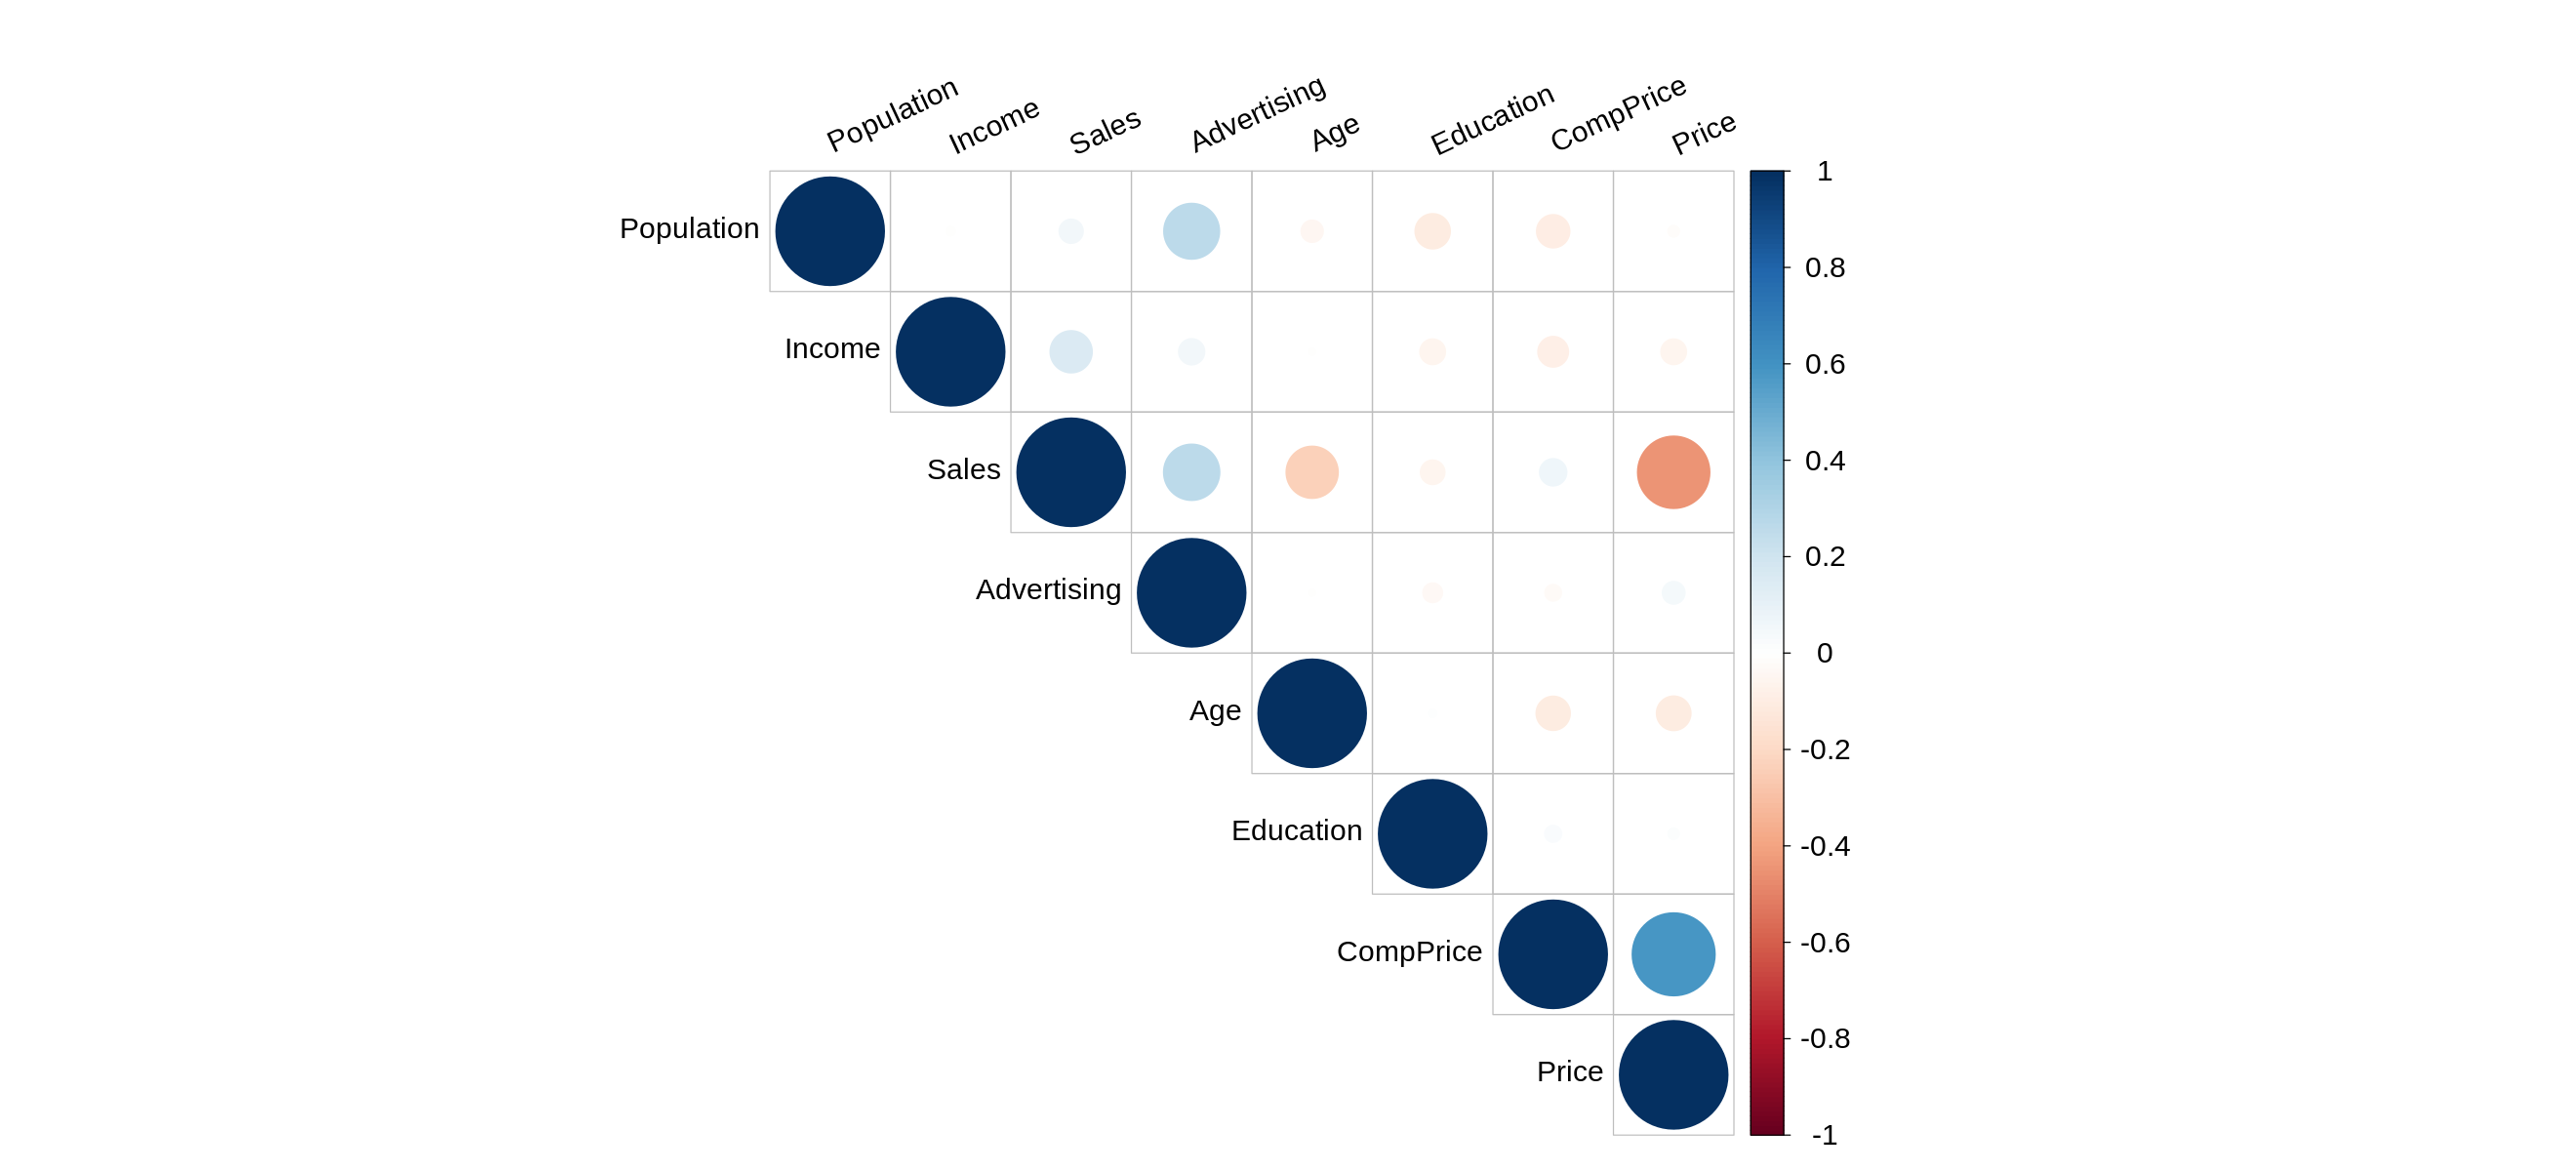

In [75]:
library(corrplot)

options(cor_df.plot.width=10, repr.plot.height=10)
corrplot(cor_df, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 25, tl.cex=font_size_labels, 
         cl.cex=font_size_axis)

Now lets look at regression lines of some correlation pairs.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



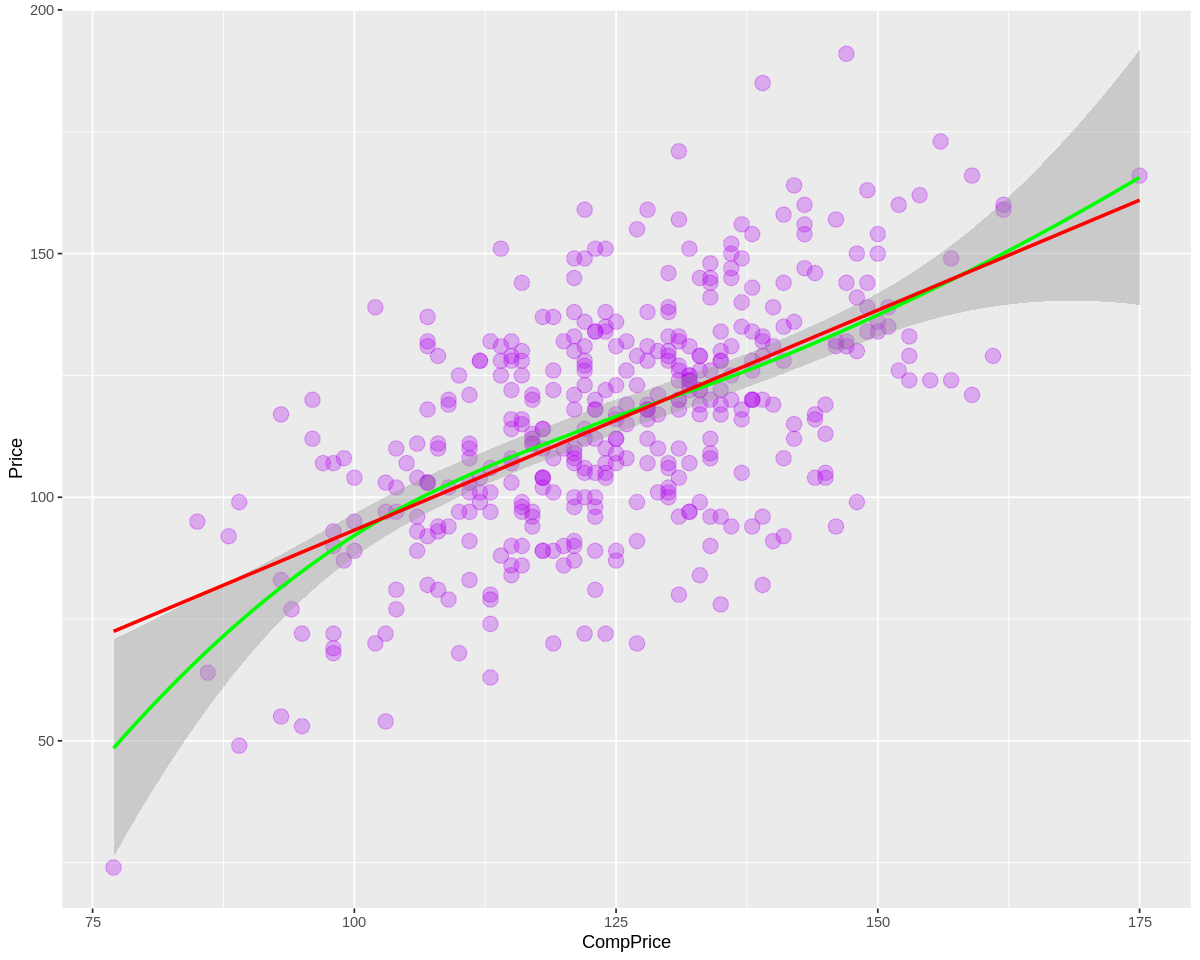

In [112]:
rgrs_price_vs_cprice <- ggplot(df, aes(y = Price, x = CompPrice))

par(mfrow = c(2, 1))
rgrs_price_vs_cprice + geom_point(alpha = 0.3, size = 4, color = "#B20CEF") + 
stat_smooth(method = "loess", color = "green", se = T) + 
stat_smooth(method = "lm", color = "red", se = F)



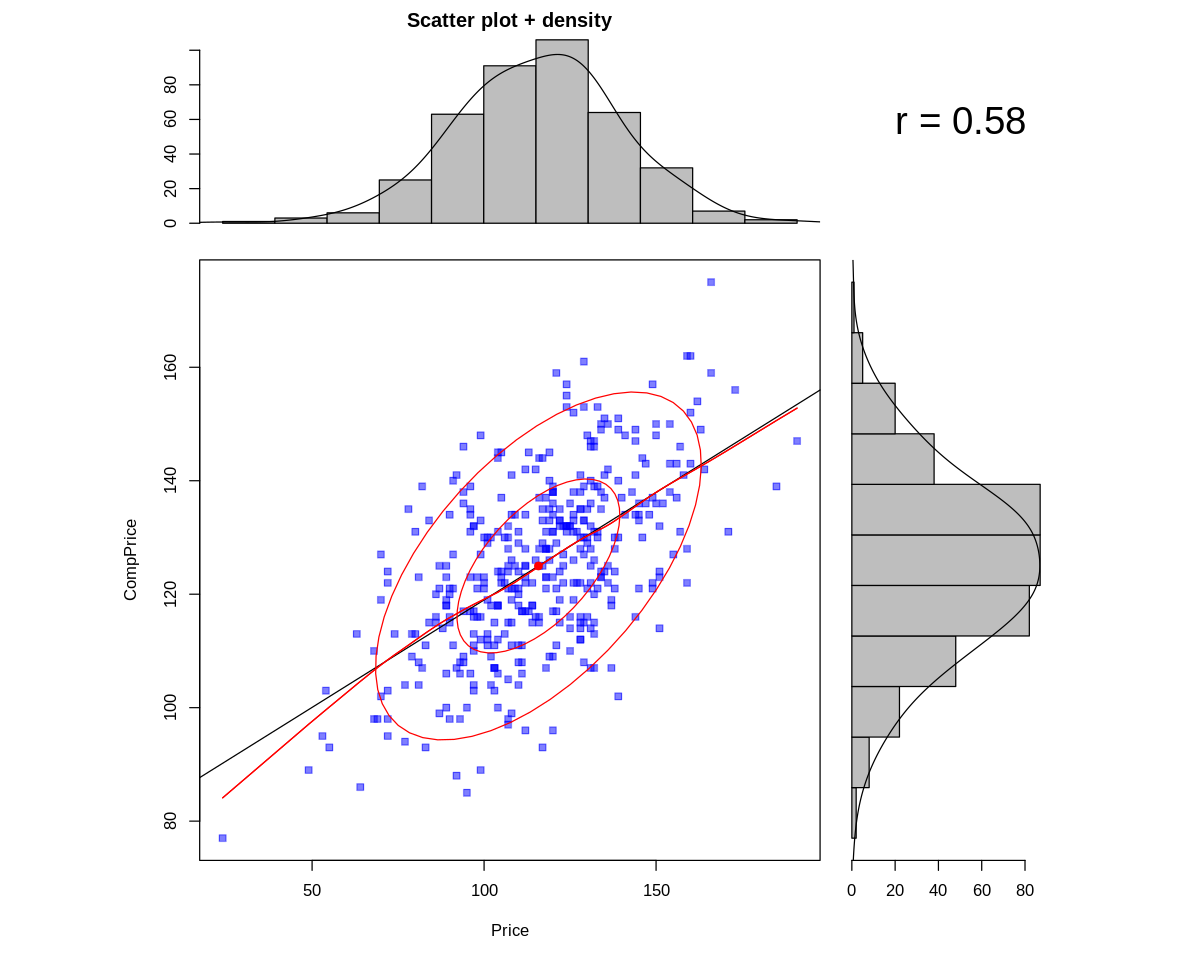

In [113]:

library(psych)
scatterHist(df$Price, df$CompPrice, xlab='Price', ylab='CompPrice', ab=T) 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



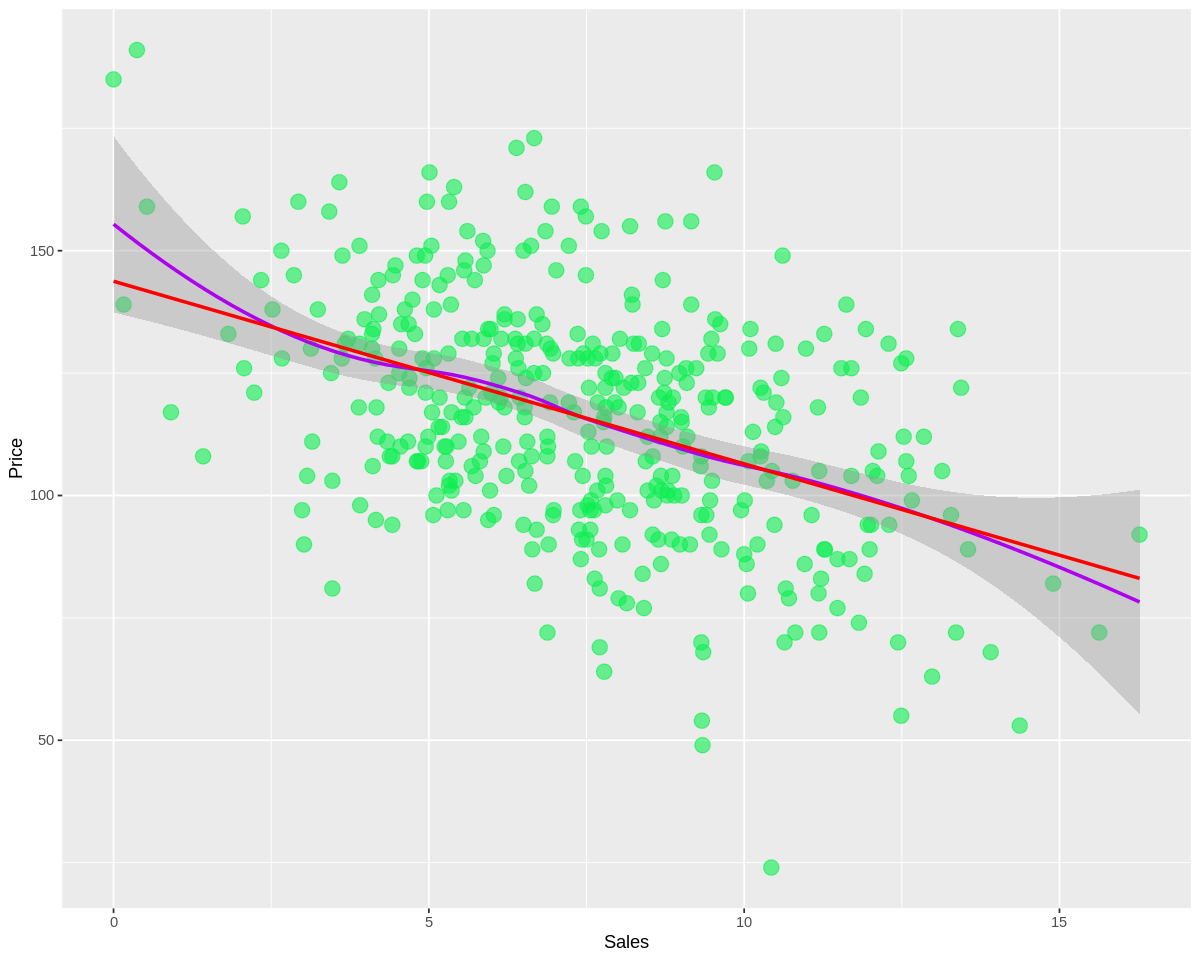

In [111]:
rgrs_price_vs_sales <- ggplot(df, aes(y = Price, x = Sales))


rgrs_price_vs_sales + geom_point(alpha = 0.6, size = 4, color = "#0CEF50") + 
stat_smooth(method = "loess", color = "#AE00EE", se = T) + 
stat_smooth(method = "lm", color = "red", se = F)



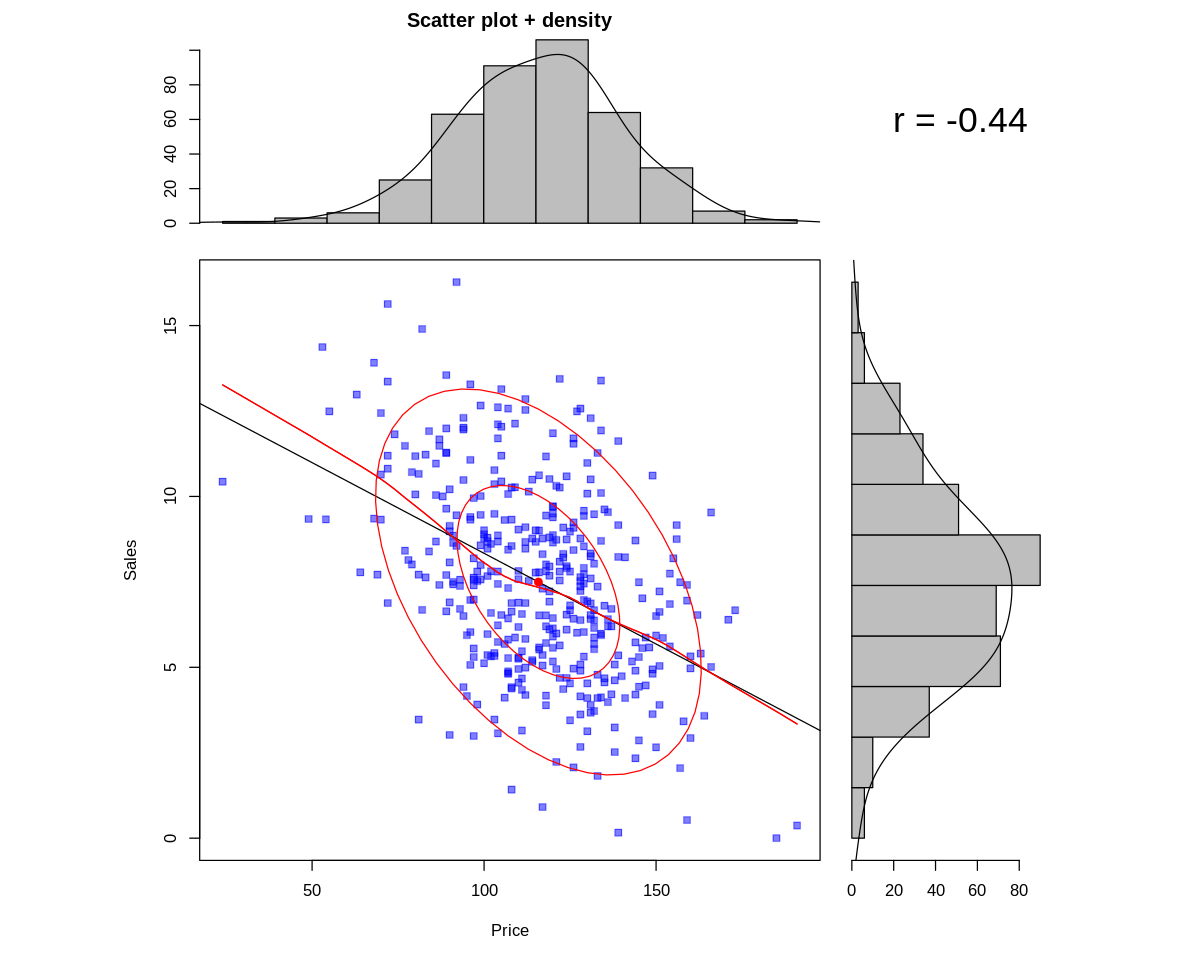

In [110]:
library(psych)
scatterHist(df$Price, df$Sales, xlab='Price', ylab='Sales', ab=T) 

From the first graph we can see, that there is a strong positive correlation between ***Price*** and ***CompPrice***, which can be logically understanded as the prices should be choosen according to the local market and prices of the competitors.

Also, the negative correlation between ***Sales*** and ***Price*** can be logically explained, since the more cheaper good is often more attractive than the expensive one the people buy less with the price growth.

Finally, lets look on the dependencies from the location of the market (rural or urban). To do this we will construct 4 IQR plots to compare differencies in columns ***Price***, ***Sales*** and ***CompPrices***.

In [95]:
data(package="ISLR")
df <- Carseats

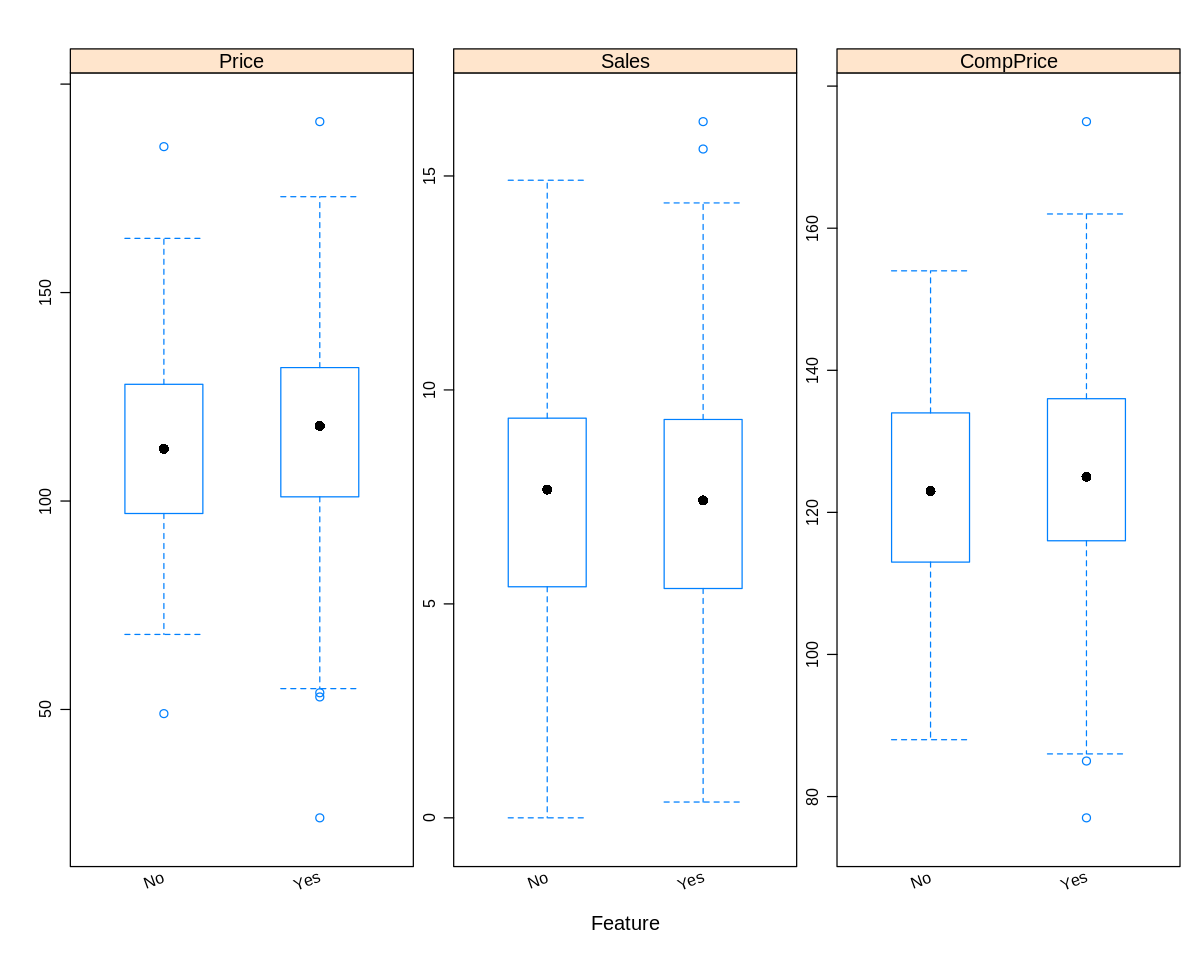

In [99]:
featurePlot(x = df[, c("Price", "Sales", "CompPrice")], 
                   y = df$Urban,
                   plot = "box",
                   scales = list(y = list(relation = "free"),
                                 x = list(rot = 20)),
                   layout = c(3, 1))

According to the data above it is noticeable, that there is no crucial differences between rural or urban area. However, the outliers are more frequent in urban area. 